# 15-Topic Model of the Constantine Beys Corpus

## Methods



## Summary of Findings



## Experimental Visualizations

In [1]:
import pandas as pd

oa15_2_topics = pd.Cov = pd.read_csv("/Users/asg/mallet/output/OA-model/oa15_2-keys.csv", sep=',', names=["topic_number", "topic_weight", "top_words"])

oa15_2_topics.style.set_properties(subset=['top_words'], **{'width': '600px'})

,topic_number,topic_weight,top_words
0,0,0.07968,fille filles mariage voyageur succédé nom épousé épousa oum-hani mari l’ouest boisis lisez allié années sultan oulad-mokrane pavillons retranchements expéditionnaire
1,1,0.0422,général rue france bône ben-gana français duc assiégés batterie brèche feu commandant l’armée batteries colonel place bataillon maréchal cavaliers chef
2,2,1.90457,bey qu’il ville faire pacha d’une temps alger d’alger fils mort province d’un dey tête turcs troupes camp c’est nouveau
3,3,0.04267,touggourt zmala pont tribu marabout qu’elle medersa espagnols toutefois qu’un d’un arches travaux construire règlement oasis d’eau côtés quartier devait
4,4,0.11048,dar-el-bey juifs dey livra population mort yoldach publique folie spectacle supplice excès l’ouad-remel hassen-bey vin genre compromis duré trouvé enquête
5,5,0.11877,el-hadj makhzen khalifa caïd-dar cheïkh aller d’ailleurs membres poste plaintes qu’il divan casba vainqueur grave plaisirs oulad toutefois l’agha avez
6,6,0.15733,dey henanecha région sud famille colonne l’est situation tunisie indigènes décida ben-gana daouaouida enfin kasba rupture notamment canons difficultés ben-zekri
7,7,0.1092,dieu l’hégire arabe mourut sidi s’est cheïkh père écrit siècle dizaine précédemment d’ailleurs l’année devons l’histoire d’ali mosquée manuscrit droit
8,8,0.10609,france français bastion calle consul ingliz peste roi comptoirs établissements navires commerce accords reïs d’afrique traité puissances beaufort agents privilèges
9,9,0.19381,tunis troupes algériens tunisiens l’armée kef tunisie algérienne tunisien algériennes tunisiennes expédition tunisienne bach-agha siège bataille défaite trône hossein-bey princes


## Initial analysis of the topics and their meanings:

<ol>
    <li><b>Marriage  and succession. Notice the explicit connection between marriage and alliances, specficially with the powerful Muqrani. It's also interesting to see words that may be marshall in meaning or more neutral and simply connote movement <b>(voyageur, l'ouest, boisis, pavillons, expéditionnaire)</b>, but the presence of "retranchements" suggests a military context. </b></li>
    <li>Battle of Constantine</li>
    <li>Leadership and transition. Notice its heavier weight in this model.</li>
    <li>Public Works. Notice the presence of the Spanish.</li>
    <li>I'm not quite sure about this topic. It's reasonably well-represented in the corpus at 11%. Perhaps crime and punishment? Here's the translation:province of the bey, Jews, Dey, deliver/hand over, population, death, janissaries, public, madness/folly, spectacle/show, torment, excess, wad-Remel, Hassen-Bey, wine/fulling mill (to pound wool fabric to make it softer and denser), type, compromise, duration/tough, found, investigation. </li>
    <li>Councilmen</li>
    <li>Tribal difficulties (with the Ottomans <em>and</em> each other?)</li>
    <li>Religion and patrilineal succession (père, précédemment, mourut</li>
    <li>French concession at La Calle. In this model, this topic also includes references to the king, Africa, treaty, power, [who is Beaufort?), commerce, ship, and the Algerian raïs/reïs.</li>
    <li>Tunisian-Algerian Conflict</li>
    <li>Negotiations between the Ottomans and tribes (among the tribes [esp. the Ben Gana and Muqrani], janissaries/militia/troops, and various leadership positions, including the Sultan, Mahkzen, caïd, and chaouchs).</li>
    <li>Cruelty & death. Notice the inclusion of the following terms in this model: victims, executions, passions, storm, winter, intention, to perish.</li>
    <li>Internal discord. Notice the inclusion of new words in this topic as well: traitor, to inform him, irons, throne, disturbance, important events, winter.</li>
    <li>Warfare. This is the first time this topic has appeared in a model and includes an interesting collection of collocations: resistance, canons, struck, ball (like canon ball or shot), courage/luck, ravine, chase/hunt, besiegers, Kabyles, cherif, and marabout. This might refer to the suppression of a marabout-led rebellion. I need to go back to the related documents and double check this assumption.</li>
    <li>Unsuccessful resistance to French colonization. This is also a new topic and includes references to specific individuals (names I hadn't thought or known to remove), such as El-Hadj___[probably refers to an indiviual whose name I added to the stopwords list], Azedine, [Ben] Aissa, the names of people groups, including the Henanaecha, French, Tunisian, and Touggourt, a place. In addition, it refers to [General?] Valée, means/ways, obligation, authority, to establish, ministry, imperialists, vainly. It sounds like it's describing Hadj Ahmed Bey's resistance to the French military invasion led by General Valée to establish a colony of imperialists, but Ahmed's resistance was ultimately in vain. Again, I'll have to see which documents are most closely related to test the accuracy of these guesses.</li>
</ol>

In [25]:
# Create a list of topic labels.
labels = ['Marriage_Success.', 'Fall of Con.', 'Leader_Success', 'Public works', 'Malfeasance', 'Councilmen', 'Trib_Diff', 'Religion_Gov', 'French-concess', 'Tun-Alg Conflict', 'Ott-Tribe neg.', 'Despotic gov.', 'Internal upheaval', 'Tribal rebel.', 'Resist-to-French']

# Add the labels list as a new column to the dataframe
oa15_2_topics['labels'] = labels

# Adjust the style of the dataframe so that the column of top_words is wide enough to see all of them.
oa15_2_topics.style.set_properties(subset=['top_words'], **{'width': '500px'})

,topic_number,topic_weight,top_words,labels
0,0,0.07968,fille filles mariage voyageur succédé nom épousé épousa oum-hani mari l’ouest boisis lisez allié années sultan oulad-mokrane pavillons retranchements expéditionnaire,Marriage_Success.
1,1,0.0422,général rue france bône ben-gana français duc assiégés batterie brèche feu commandant l’armée batteries colonel place bataillon maréchal cavaliers chef,Fall of Con.
2,2,1.90457,bey qu’il ville faire pacha d’une temps alger d’alger fils mort province d’un dey tête turcs troupes camp c’est nouveau,Leader_Success
3,3,0.04267,touggourt zmala pont tribu marabout qu’elle medersa espagnols toutefois qu’un d’un arches travaux construire règlement oasis d’eau côtés quartier devait,Public works
4,4,0.11048,dar-el-bey juifs dey livra population mort yoldach publique folie spectacle supplice excès l’ouad-remel hassen-bey vin genre compromis duré trouvé enquête,Malfeasance
5,5,0.11877,el-hadj makhzen khalifa caïd-dar cheïkh aller d’ailleurs membres poste plaintes qu’il divan casba vainqueur grave plaisirs oulad toutefois l’agha avez,Councilmen
6,6,0.15733,dey henanecha région sud famille colonne l’est situation tunisie indigènes décida ben-gana daouaouida enfin kasba rupture notamment canons difficultés ben-zekri,Trib_Diff
7,7,0.1092,dieu l’hégire arabe mourut sidi s’est cheïkh père écrit siècle dizaine précédemment d’ailleurs l’année devons l’histoire d’ali mosquée manuscrit droit,Religion_Gov
8,8,0.10609,france français bastion calle consul ingliz peste roi comptoirs établissements navires commerce accords reïs d’afrique traité puissances beaufort agents privilèges,French-concess
9,9,0.19381,tunis troupes algériens tunisiens l’armée kef tunisie algérienne tunisien algériennes tunisiennes expédition tunisienne bach-agha siège bataille défaite trône hossein-bey princes,Tun-Alg Conflict


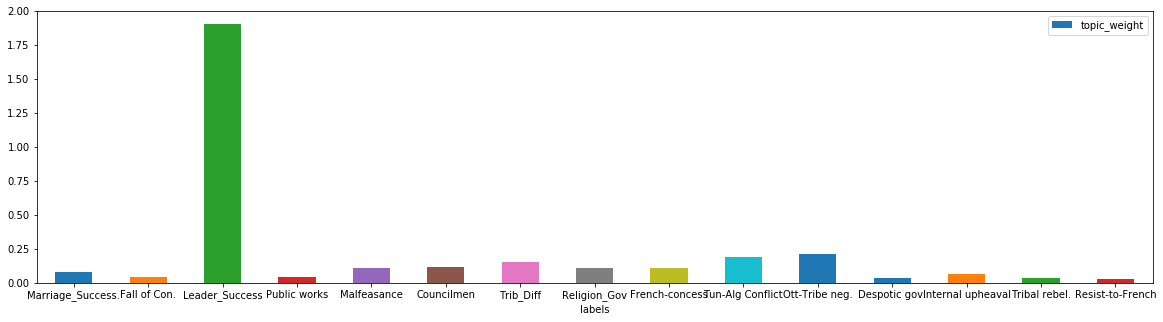

In [26]:
# Represent the weights of the topics as a simple bar chart, using the author-created topic labels. 

topic_bar = oa15_2_topics.plot.bar(x='labels', y='topic_weight', rot=0, figsize=(20,5))

In [28]:
# The mallet .txt doc-topics output file was converted to a csv, and the columns for 
# document numbers and filepaths were deleted in advance of reading the csv into a 
# pandas dataframe. Be sure to convert the columns to number data type with ~6 decimal places to remove the 
# exponential format. Also, add a new line at the top of the csv with the labels defined in the previous step.

oa15_2_docs = pd.Cov = pd.read_csv("/Users/asg/mallet/output/OA-model/oa15_2-doc-topics.csv", sep=',')

# Uncomment the following line to view dataframe
#oa15_2_docs

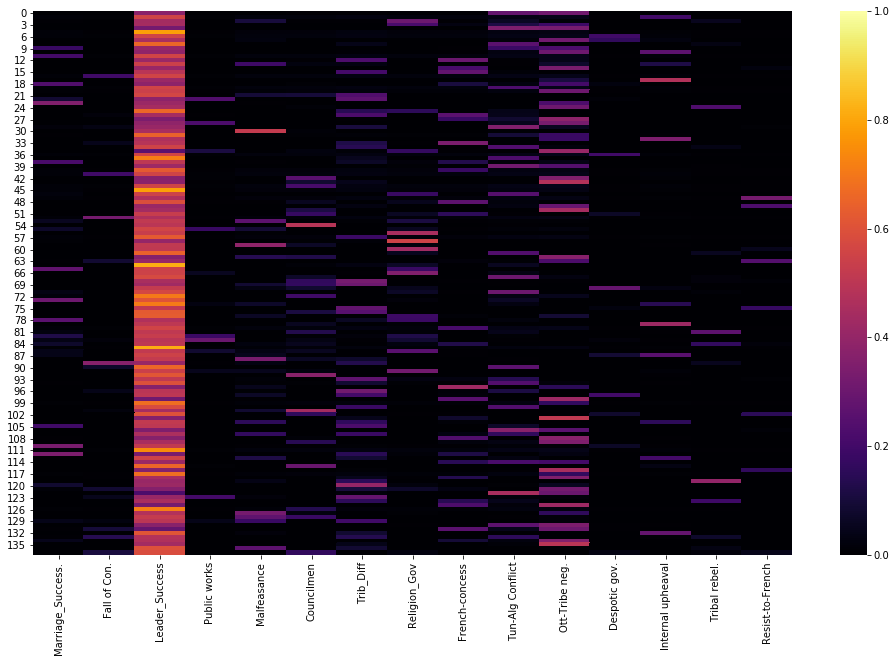

In [29]:
# Represent the topic weights in each document as a heatmap.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (17.0, 10.0)

oa15_2_docs = oa15_2_docs[oa15_2_docs.columns].astype(float)

# Create a heatmap that is visually accessible (see https://matplotlib.org/tutorials/colors/colormaps.html)
# using the 'inferno' colormap. 

sns.heatmap(oa15_2_docs, cmap='inferno', vmin=0.0, vmax=1.0)

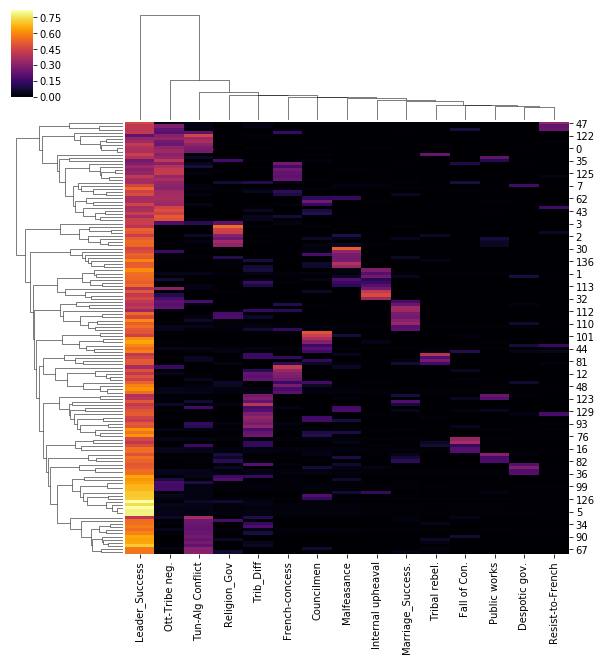

In [30]:
# Create a hierarchical heatmap using seaborn's "clustermap" method with default settings.
# By default this method will cluster by both rows and columns, which is what is most useful for this data.

sns.clustermap(oa15_2_docs, cmap='inferno')

## Visualizing Mallet output with pyLDAvis
You will need to generate MALLET's output-topic-states <b>gz</b> file to prepare the MALLET output in the format needed by pyLDAvis. I didn't know about this possibility, so I had to run MALLET again, creating a different 5-topic model than the ones visualized above. 

Huge thanks to <a href="https://jeriwieringa.com/about/">Jeri E. Wieringa</a> for making this connection and sharing all of the code! You can find her explanation and code at <a href="https://jeriwieringa.com/2018/07/17/pyLDAviz-and-Mallet/">"Using pyLDAvis with Mallet."</a>

In [15]:
import pandas as pd
import gzip
import os

dataDir = "/Users/asg/mallet/output/OA-model/"

def extract_params(statefile):
    """Extract the alpha and beta values from the statefile. 
    
    Args:
        statefile (str): Path to the statefile produced by Mallet.
    Returns:
        tuple: alpha (list), beta
    """
    with gzip.open(statefile, 'r') as state:
        params = [x.decode('utf-8').strip() for x in state.readlines()[1:3]]
    return (list(params[0].split(":")[1].split(" ")), float(params[1].split(":")[1]))

def state_to_df(statefile):
    """Transform state file into pandas dataframe. 
    The Mallet statefile is tab-separated, and the first two rows contain the alpha and beta hyperparameters.
    
    Args:
        statefile (str): Path to statefile produced by Mallet.
    Returns:
        dataframe: topic assignment for each token in each document of the model
    """
    return pd.read_csv(statefile,
                      compression='gzip',
                      sep=' ',
                      skiprows=[1,2]
                      )

In [16]:
params = extract_params(os.path.join(dataDir, 'oa15_2-topic-state.gz'))

alpha = [float(x) for x in params[0][1:]]
beta = params[1]
print("{}, {}".format(alpha, beta))

df = state_to_df(os.path.join(dataDir, 'oa15_2-topic-state.gz'))

[0.07968204931093809, 0.04219815629969897, 1.9045747392302739, 0.04266538159301311, 0.1104765859928586, 0.11876522234283485, 0.15733253776992104, 0.10919637919093586, 0.10609084866299835, 0.1938079206260494, 0.20940528454108945, 0.033097425661145645, 0.06224711363348801, 0.03588727340261094, 0.029591690377834434], 0.08968854811842221


In [17]:
# Define column 'type' as a string to avoid nan pandas errors.
df['type'] = df.type.astype(str)

# Preview the dataframe from the statefile, which will then be used to generate the data needed for the 
# LDAvis library. 
df[:4]

,#doc,source,pos,typeindex,type,topic
0,0,data/OttAlg/gaid-36.txt,0,0,naaman-bey,9
1,0,data/OttAlg/gaid-36.txt,1,1,mai,2
2,0,data/OttAlg/gaid-36.txt,2,2,turc,2
3,0,data/OttAlg/gaid-36.txt,3,3,naissance,2


<b>Step 1:</b> We need the length of the documents. To do this, Jeri grouped the data by document id and counted the tokens in the doc. This data is then sorted by the doc id, so it will be in the correct order for visualization pre-processing.

In [18]:
# Get document lengths from statefile.
docs = df.groupby('#doc')['type'].count().reset_index(name='doc_length')

# Preview the gathered & grouped data:
docs[:4]

,#doc,doc_length
0,0,579
1,1,2
2,2,17
3,3,320


<b>Step 2:</b> We need the voabulary and frequencies. Jeri used pandas to generate a new frame with the word counts. She then sorted this df so that it is alphabetical by type, a step that will need to be repeated when creating the topic-term matrix because the order matters and must be kept consistent. Just as in Jeri's example, I, too, have OCR errors (see the first entry in the vocab dataframe above).

In [19]:
# Get vocab and term frequencies from the statefile.
vocab = df['type'].value_counts().reset_index()
vocab.columns = ['type', 'term_freq']
vocab = vocab.sort_values(by='type', ascending=True)

# Preview the resulting dataframe
vocab[:4]

,type,term_freq
12926,a*tes,1
8992,a-t-elle,1
5170,a-t-il,3
6327,abaissement,2


<b>Step 3:</b> Create matrix files. The values need to be smoothed and the data normalized so that each row sums to 1. Jeri used sklearn to handle large matrices efficiently. 

In [20]:
# Topic-term matrix from state file.

import sklearn.preprocessing

def pivot_and_smooth(df, smooth_value, rows_variable, cols_variable, values_variable):
    """
    Turns the pandas dataframe into a data matrix.
    Args:
        df (dataframe): aggregated dataframe
        smooth_value (float): value to add to the matrix to account for the priors
        rows_variable (str): name of dataframe row to use as the rows in the matrix
        cols_variable (str): name of dataframe column to use as the columns in the matrix
        values_variable (str): name of the dataframe column to use as the values in the matrix
    Returns:
        dataframe: pandas matrix that has been normalized on the rows
    """
    matrix = df.pivot(index=rows_variable, columns=cols_variable, values=values_variable).fillna(value=0)
    matrix = matrix.values
    normed = sklearn.preprocessing.normalize(matrix, norm='l1', axis=1)
    return pd.DataFrame(normed)

<b>Step 4:</b> [From Jeri's post] Next, we need to aggregate the data from the statefile dataframe to get the nmber of topic assignments for words in the documents. For <b>phi</b>, the topic-term matrix, [she] aggregated by topic and word, counted the number of times each word was assigned to each topic, and then sorted the resulting dataframe alphabetically by word, so that it matches the order of the vocabulary frame. Here, [she] used the <b>beta</b> hyperparameter as the smoothing value.

In [21]:
phi_df = df.groupby(['topic', 'type'])['type'].count().reset_index(name ='token_count')
phi_df = phi_df.sort_values(by='type', ascending=True)

phi_df[:10]

phi = pivot_and_smooth(phi_df, beta, 'topic', 'type', 'token_count')

phi[:10]

,0,1,2,3,4,5,6,7,8,9,...,16790,16791,16792,16793,16794,16795,16796,16797,16798,16799
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000601,0.000000,0.000601,0.0,0.000601,0.000000,0.000000,0.000601,0.000000,0.0
1,0.000000,0.0,0.000203,0.000000,0.000203,0.000000,0.000203,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000051,0.000000,0.000000,0.000000,0.000000,0.000154,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000051,0.000000,0.000231,0.000051,0.0
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000355,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.000934,0.000000,0.000000,0.000000,0.000000,0.000467,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.0,0.000000,0.000000,0.000000,0.000171,0.000000,0.000000,0.000000,0.0,...,0.000171,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000506,0.0,0.000000,0.000000,0.000000,0.000000,0.000506,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000297,0.000000,0.000297,0.0


<b>Step 5:</b> We do the same thing again, but focused on the documents and topics (rather than words & topics) to generate the <b>theta</b> document-topic matrix. Here, <b>alpha</b> is used as the smoothing value.

In [22]:
theta_df = df.groupby(['#doc', 'topic'])['topic'].count().reset_index(name ='topic_count')

theta_df[:10]

theta = pivot_and_smooth(theta_df, alpha, '#doc', 'topic', 'topic_count')

theta[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.0,0.376511,0.0,0.000000,0.006908,0.006908,0.000000,0.000000,0.283247,0.317789,0.001727,0.006908,0.000000,0.0
1,0.000000,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0
2,0.000000,0.0,0.411765,0.0,0.117647,0.000000,0.000000,0.352941,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.0
3,0.000000,0.0,0.440625,0.0,0.003125,0.000000,0.000000,0.218750,0.028125,0.118750,0.190625,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.318328,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.350482,0.331190,0.000000,0.000000,0.000000,0.0
5,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0
7,0.000000,0.0,0.457775,0.0,0.023458,0.000000,0.000000,0.000000,0.000000,0.019437,0.313673,0.162198,0.023458,0.000000,0.0
8,0.000000,0.0,0.661376,0.0,0.000000,0.000000,0.042328,0.000000,0.000000,0.264550,0.000000,0.000000,0.000000,0.031746,0.0
9,0.177725,0.0,0.409953,0.0,0.000000,0.000000,0.000000,0.000000,0.004739,0.182464,0.225118,0.000000,0.000000,0.000000,0.0


The above processing steps represent about 90% of the work needed to prepare the mallet data for visualization with the LDAvis library. Now that all of the data has been formatted for pyLDAvis, we can queue it up and pass it to the visualization library.

In [23]:
import pyLDAvis

data = {'topic_term_dists': phi,
        'doc_topic_dists': theta,
        'doc_lengths': list(docs['doc_length']),
        'vocab': list(vocab['type']),
        'term_frequency': list(vocab['term_freq'])
}

vis_data = pyLDAvis.prepare(**data)

pyLDAvis.display(vis_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
